CS6140 Assignment 1
Q1.2 Decision Tree using Sklearn Library

In [57]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier       # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics                           #Import scikit-learn metrics module for accuracy calculation
from matplotlib import pyplot as plt                  #Plot decision tree
from sklearn import tree                               #Plot decision tree

zczcxz

In [58]:
dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CS6140 Assignment1/data.csv")
dataset.head()

,feature1,feature2,feature3,feature4,class
0,5.0,3.5,1.3,0.3,0
1,6.9,3.1,4.9,1.5,1
2,5.8,2.6,4.0,1.2,1
3,6.7,3.0,5.2,2.3,2
4,5.1,3.3,1.7,0.5,0


In [59]:
#split dataset in features and target variable
feature_cols = ['feature1', 'feature2', 'feature3', 'feature4']
X = dataset[feature_cols]       #Assign all feature coloumns into variable X
y = dataset['class']             # Target variable
print("feature variables\n", X)
print("label\n", y)

feature variables
      feature1  feature2  feature3  feature4
0         5.0       3.5       1.3       0.3
1         6.9       3.1       4.9       1.5
2         5.8       2.6       4.0       1.2
3         6.7       3.0       5.2       2.3
4         5.1       3.3       1.7       0.5
..        ...       ...       ...       ...
145       7.4       2.8       6.1       1.9
146       6.2       2.9       4.3       1.3
147       5.6       2.5       3.9       1.1
148       5.1       3.5       1.4       0.2
149       6.4       3.2       5.3       2.3

[150 rows x 4 columns]
label
 0      0
1      1
2      1
3      2
4      0
      ..
145    2
146    1
147    1
148    0
149    2
Name: class, Length: 150, dtype: int64


In [60]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # 70% training and 30% test
print(X_train.shape , y_train.shape)

(105, 4) (105,)


In [61]:
model = DecisionTreeClassifier(criterion="gini")
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

In [62]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_2 <= 4.85
|   |   |--- feature_0 <= 4.95
|   |   |   |--- feature_3 <= 1.35
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.35
|   |   |   |   |--- class: 2
|   |   |--- feature_0 >  4.95
|   |   |   |--- class: 1
|   |--- feature_2 >  4.85
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_2 <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  4.95
|   |   |   |   |--- feature_0 <= 6.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_0 >  6.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_3 >  1.75
|   |   |   |--- class: 2



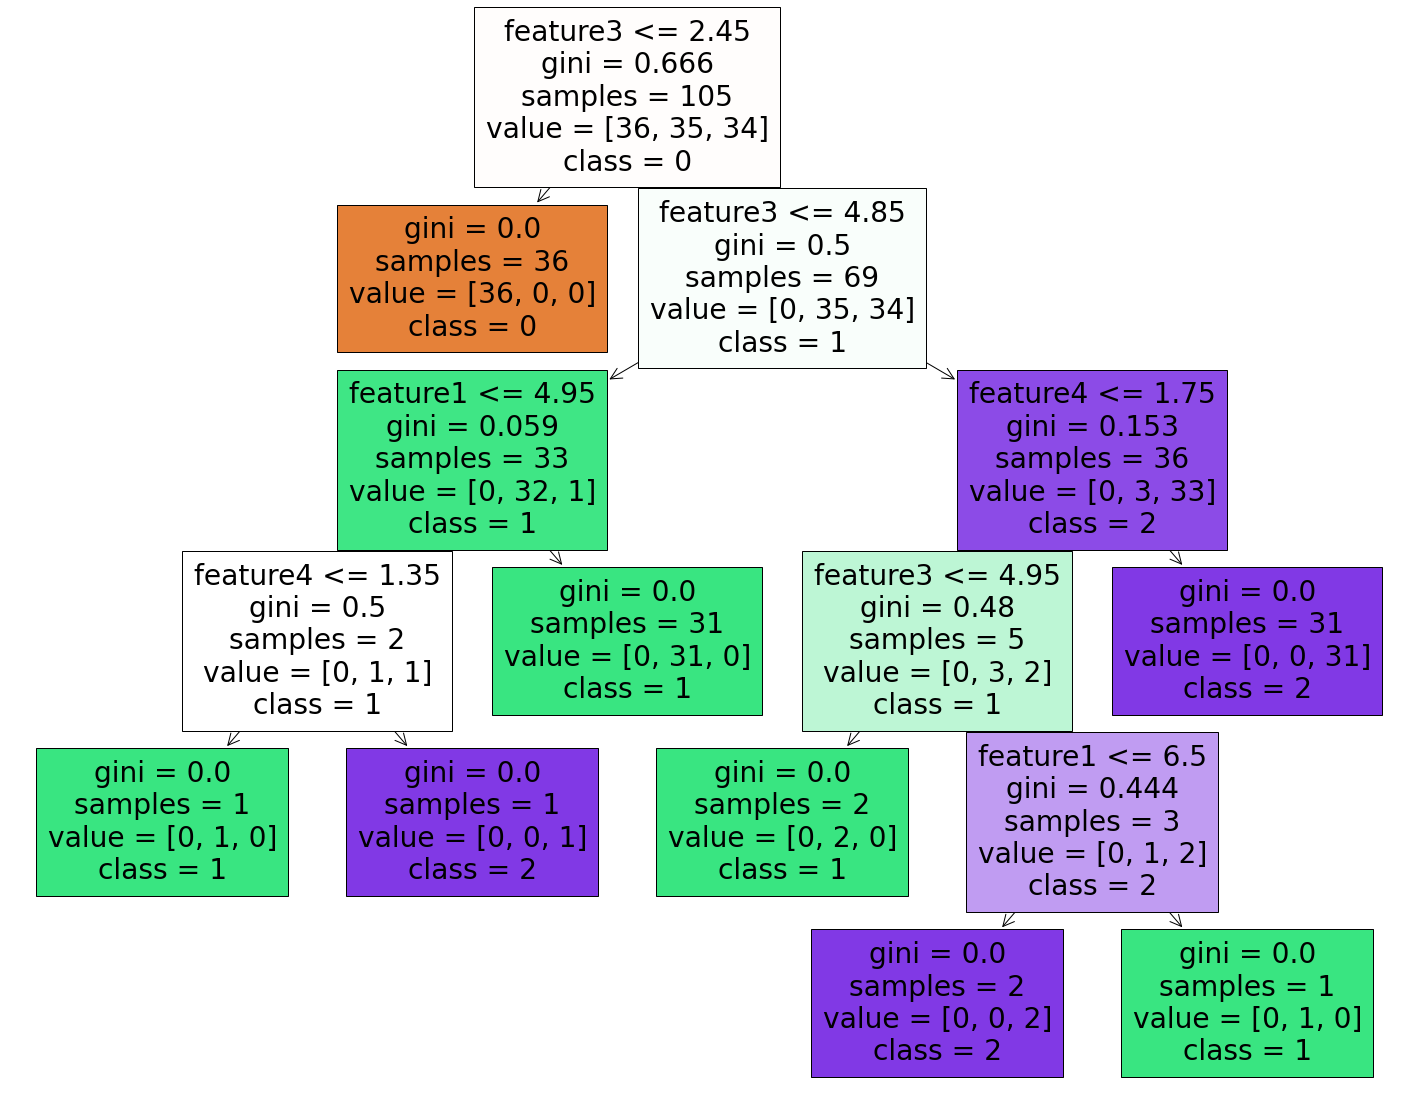

In [67]:
fig = plt.figure(figsize=(25,20))
plt.title("Decision tree trained on all the iris features")
_ = tree.plot_tree(model, 
                   feature_names=feature_cols,  
                   class_names=['0','1','2'],
                   filled=True)

In [55]:
print("Testing Accuracy : " , metrics.accuracy_score(y_test, y_pred))

Testing Accuracy :  0.9333333333333333
